# Análise da evolução da carteira de crédito das cooperativas por UF do Brasil 



O objetivo desta análise é identificar a participação do cooperativismo de crédito no Brasil e sua evolução no decorrer do tempo. 

base de dados:
a base de dados está disponibilizada pelo Bacen no formato CSV. em: 
https://dadosabertos.bcb.gov.br/dataset/scr_data



In [27]:
# as bibliotecas disponíveis para plotar os gráficos e manupulação dedados:
import pandas as pd
import plotly.express as px
# Biblioteca para plotar mapa com gráfico de calor
##import folium
#from folium.plugins import HeatMap
#from folium import plugins
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# carregar bancos de dados
# foram carregados os dados dos últimos 12 meses movimento que foram criados em arquivo python separados
df = pd.read_csv("dataframe.csv")

C:\Users\fabio\AppData\Local\Temp\ipykernel_12864\3326266496.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataframe.csv")


In [6]:
dados = df

Preparar os dados para analisar a carteira geral por estado por tipo de instituição e postetiormente comparar com o cooperativismo.
será criado uma visão do total por estado e sua evolução e uma visão da share do cooperativimo por estado e sua evolução.


# envidamento total por estados:


In [9]:
# Total do envidamento por estados:
## Agrupar
dados_group = dados.groupby(['data_base', 'uf'])[['carteira_ativa', 'carteira_inadimplida_arrastada']].sum().reset_index()
dados_group = dados_group.loc[dados_group['data_base']== '2023-06-30 00:00:00']
dados_group = dados_group.rename(columns  = {'uf': 'sigla'})
dados_group = dados_group[['sigla', 'carteira_ativa']]

C:\Users\fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


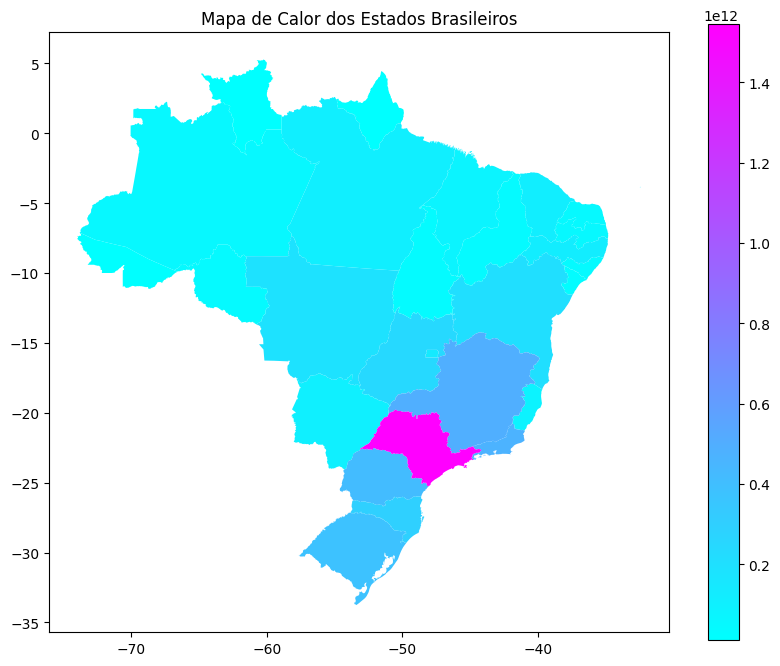

In [19]:
# Carregue o shapefile dos estados brasileiros
#arquivo disponível para dowload em:
#  https://docs.google.com/file/d/0B__Rg9h09RtfQU9jbEpxcW9xREk/edit?pli=1&resourcekey=0-po0pdYgc-QZ5Pt13twjIsg
brasil = gpd.read_file(r"D:\Projetos_Analytics\01.cooperativas\estados_2010\estados_2010.shp")
# Combine o DataFrame dos estados com o DataFrame do mapa de calor
brasil = brasil.merge(dados_group, on='sigla',how='left')
# Plote o mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
brasil.plot(column='carteira_ativa', cmap='cool', ax=ax, legend=True)
plt.title('Mapa de Calor dos Estados Brasileiros')
plt.show()


Aqui estão algumas opções populares de mapas de cores:

'viridis': Uma escolha padrão no Matplotlib, um cmap perceptualmente uniforme que vai de amarelo a verde e azul.

'plasma': Outro cmap padrão no Matplotlib, que vai de vermelho a roxo e azul.

'cividis': Outro cmap padrão no Matplotlib, projetado para ser acessível a pessoas com deficiência visual.

'coolwarm': Um cmap que varia entre tons frios (azul) e quentes (vermelho).

'jet': Um cmap clássico, mas geralmente não recomendado devido a problemas de percepção de cores.

'rainbow': Outro cmap clássico, mas que também pode ser problemático devido a problemas de percepção de cores.

'magma': Um cmap que vai de preto a vermelho e roxo.

'inferno': Um cmap que vai de preto a vermelho e amarelo.

'YlGnBu': Um cmap que varia de amarelo (Yl) a verde (Gn) a azul (Bu).

'RdYlBu': Um cmap que vai de vermelho (Rd) a amarelo (Yl) a azul (Bu).

'cool': Um cmap que varia de ciano a magenta.

'copper': Um cmap que simula a aparência do metal cobre.

Comentários:
    A região sudeste é onde existe maior carteira de crédito, principalmente no município de São Paulo.

# carteira do cooperativismo:


In [22]:
#Filtrar cooperativas:
dados2 = dados
dados2 = dados2.loc[dados2['tcb'] == 'Cooperativas']

# Total do envidamento por estados:
## Agrupar
dados_coop = dados2.groupby(['data_base', 'uf'])[['carteira_ativa', 'carteira_inadimplida_arrastada']].sum().reset_index()
dados_coop = dados_coop.loc[dados_coop['data_base']== '2023-06-30 00:00:00']
dados_coop = dados_coop.rename(columns  = {'uf': 'sigla'})
dados_coop = dados_coop[['sigla', 'carteira_ativa']]

C:\Users\fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


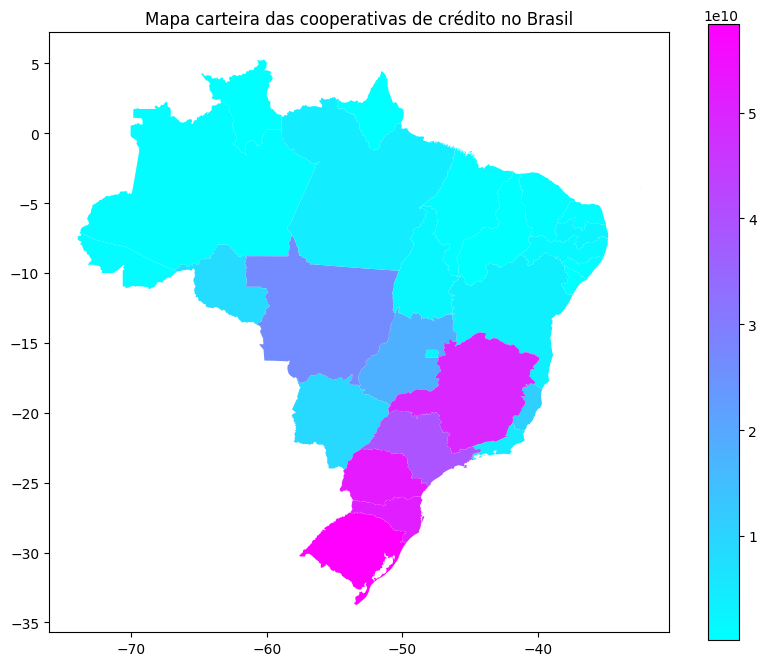

In [23]:
# Carregue o shapefile dos estados brasileiros
brasil2 = gpd.read_file(r"D:\Projetos_Analytics\01.cooperativas\estados_2010\estados_2010.shp")

# Combine o DataFrame dos estados com o DataFrame do mapa de calor
brasil_coop = brasil2.merge(dados_coop, on='sigla',how='left')

# Plote o mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
brasil_coop.plot(column='carteira_ativa', cmap='cool', ax=ax, legend=True)
plt.title('Mapa carteira das cooperativas de crédito no Brasil')
plt.show()


Obs: 
    O cooperativismo de crédito tem maior concentração nas regiões sul e sudeste do Brasil, sendo maior na região sul e em terceiro lugar na região centroeste


Market share cooperativismo:

In [43]:
# juntar dividir o saldo devedor do cooperativismo com o saldo devedor total:
bench = dados_group.merge(dados_coop, on = 'sigla', how = 'left')
# criar coluna com valor de bench mark
bench['benchmark'] = bench['carteira_ativa_y'] / bench['carteira_ativa_x'] *100
# Separar linhas para o gráfico:
bench = bench[['sigla', 'benchmark']]
bench['benchmark'] = bench['benchmark'].round(2)

C:\Users\fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\plotting.py:732: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



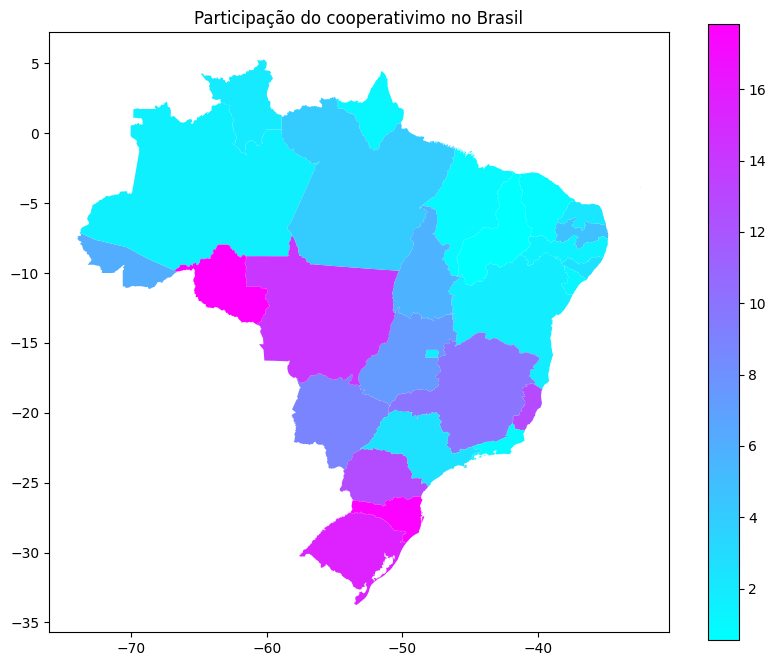

In [44]:
#Gráfico:
# Carregue o shapefile dos estados brasileiros
brasil3 = gpd.read_file(r"D:\Projetos_Analytics\01.cooperativas\estados_2010\estados_2010.shp")

# Combine o DataFrame dos estados com o DataFrame do mapa de calor
bench_brasil = brasil3.merge(bench, on='sigla',how='left')

# Plote o mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
bench_brasil.plot(column='benchmark', cmap='cool', ax=ax, legend=True)
plt.title('Participação do cooperativimo no Brasil')
plt.show()

In [ ]:
# reduzir casas decimais para 2 da coluna benchmark


In [55]:

# Classifique o DataFrame por 'benchmark' em ordem decrescente
bench_brasil_sorted = bench_brasil.sort_values(by='benchmark', ascending=False)
# Crie o gráfico de barras
fig4 = px.bar(
    bench_brasil_sorted,
    x='sigla',
    y='benchmark',
    title='MarketShare - Participação do cooperativismo por UF',
    color='benchmark',  # Use a coluna 'benchmark' para definir as cores
    color_continuous_scale='Viridis'  # Escolha uma escala de cores
)
fig4.show()


In [31]:
bench_brasil.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          27 non-null     int64   
 1   nome        27 non-null     object  
 2   sigla       27 non-null     object  
 3   regiao_id   27 non-null     object  
 4   codigo_ibg  27 non-null     object  
 5   geometry    27 non-null     geometry
 6   benchmark   27 non-null     float64 
dtypes: float64(1), geometry(1), int64(1), object(4)
memory usage: 1.6+ KB
